In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, RocCurveDisplay,roc_auc_score,classification_report


In [4]:
data = pd.read_excel("fake_account_dataset.xlsx")
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,follow_ratio
0,1,0.27,0.0,0.0,0,53.0,0,0,32,1000,955,0,1.047071
1,1,0.00,2.0,0.0,0,44.0,0,0,286,2740,533,0,5.132959
2,1,0.10,2.0,0.0,0,0.0,0,1,13,159,98,0,1.616162
3,1,0.00,1.0,0.0,0,82.0,0,0,679,414,651,0,0.636503
4,1,0.00,2.0,0.0,0,0.0,0,1,6,151,126,0,1.196850


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           1200 non-null   int64  
 1   nums/length username  1200 non-null   float64
 2   fullname words        1200 non-null   float64
 3   nums/length fullname  1200 non-null   float64
 4   name==username        1200 non-null   int64  
 5   description length    1200 non-null   float64
 6   external URL          1200 non-null   int64  
 7   private               1200 non-null   int64  
 8   #posts                1200 non-null   int64  
 9   #followers            1200 non-null   int64  
 10  #follows              1200 non-null   int64  
 11  fake                  1200 non-null   int64  
 12  follow_ratio          1200 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 122.0 KB


In [6]:
data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,follow_ratio
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1.200000e+03
mean,0.715833,0.165820,1.482086,0.040059,0.040000,24.299388,0.115000,0.366667,119.779167,8.551319e+04,560.030000,0.493333,4.051104e+03
std,0.451205,0.217660,1.069781,0.138720,0.196041,40.067729,0.319155,0.482095,470.397495,8.053278e+05,1020.750169,0.500164,6.271568e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.170960e-03
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375000e+01,63.750000,0.000000,3.846154e-01
50%,1.000000,0.000000,1.001198,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.655000e+02,255.500000,0.000000,8.125732e-01
75%,1.000000,0.314475,2.000000,0.000000,0.000000,35.000000,0.000000,1.000000,75.250000,6.755000e+02,592.750000,1.000000,1.651489e+00
max,1.000000,0.967149,12.000000,1.068951,1.000000,158.236266,1.000000,1.000000,8172.000000,1.533854e+07,7690.000000,1.000000,1.519524e+06


In [7]:
data = data.drop(["name==username","nums/length fullname"],axis =1)

In [8]:
data.describe()

,profile pic,nums/length username,fullname words,description length,external URL,private,#posts,#followers,#follows,fake,follow_ratio
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1.200000e+03
mean,0.715833,0.165820,1.482086,24.299388,0.115000,0.366667,119.779167,8.551319e+04,560.030000,0.493333,4.051104e+03
std,0.451205,0.217660,1.069781,40.067729,0.319155,0.482095,470.397495,8.053278e+05,1020.750169,0.500164,6.271568e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.170960e-03
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.375000e+01,63.750000,0.000000,3.846154e-01
50%,1.000000,0.000000,1.001198,0.000000,0.000000,0.000000,9.000000,1.655000e+02,255.500000,0.000000,8.125732e-01
75%,1.000000,0.314475,2.000000,35.000000,0.000000,1.000000,75.250000,6.755000e+02,592.750000,1.000000,1.651489e+00
max,1.000000,0.967149,12.000000,158.236266,1.000000,1.000000,8172.000000,1.533854e+07,7690.000000,1.000000,1.519524e+06


In [9]:
X = data.drop(["fake"],axis=1)
X.head()

,profile pic,nums/length username,fullname words,description length,external URL,private,#posts,#followers,#follows,follow_ratio
0,1,0.27,0.0,53.0,0,0,32,1000,955,1.047071
1,1,0.00,2.0,44.0,0,0,286,2740,533,5.132959
2,1,0.10,2.0,0.0,0,1,13,159,98,1.616162
3,1,0.00,1.0,82.0,0,0,679,414,651,0.636503
4,1,0.00,2.0,0.0,0,1,6,151,126,1.196850


In [10]:
Y = data["fake"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: fake, dtype: int64

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# Scaling

In [12]:
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42)
}


results = []

for scaler_name, scaler in scalers.items():

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, pred)

        results.append([scaler_name, model_name, acc])
        print(f"{scaler_name} + {model_name} → Accuracy = {acc:.4f}")


best = max(results, key=lambda x: x[2])

print("\nBest Combination")
print(f"Scaler: {best[0]}")
print(f"Model: {best[1]}")
print(f"Accuracy: {best[2]:.4f}")


StandardScaler + KNN → Accuracy = 0.8889
StandardScaler + DecisionTree → Accuracy = 0.9472
StandardScaler + RandomForest → Accuracy = 0.9833
MinMaxScaler + KNN → Accuracy = 0.8861
MinMaxScaler + DecisionTree → Accuracy = 0.9472
MinMaxScaler + RandomForest → Accuracy = 0.9833
RobustScaler + KNN → Accuracy = 0.9333
RobustScaler + DecisionTree → Accuracy = 0.9389
RobustScaler + RandomForest → Accuracy = 0.9833

Best Combination
Scaler: StandardScaler
Model: RandomForest
Accuracy: 0.9833


In [13]:
best_scaler = best[0]
best_model_name = best[1]
best_scaler_obj = scalers[best_scaler]
best_model = models[best_model_name]

# Standard Scaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest

In [15]:
model = RandomForestClassifier(n_estimators=100,oob_score=True,random_state=42,max_depth=5,criterion='gini')
model.fit(X_train_scaled,y_train)
pred = model.predict(X_test_scaled)

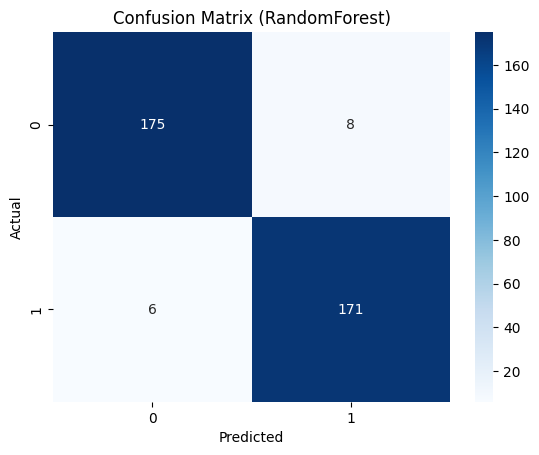


Cross Validation Scores: [0.9875     0.97083333 0.95833333 0.99583333 0.99166667]

Mean Accuracy: 0.9808333333333333

AUC Score = 0.9522



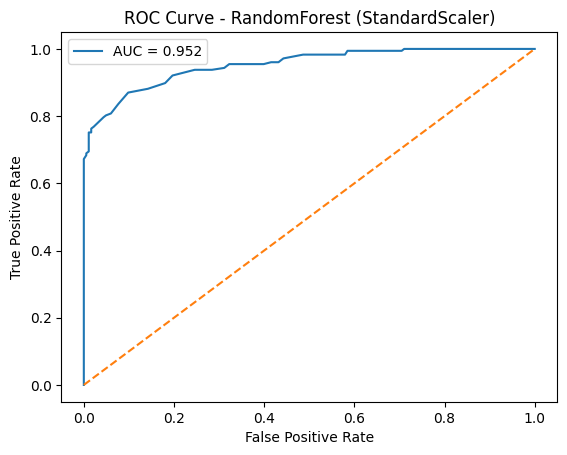

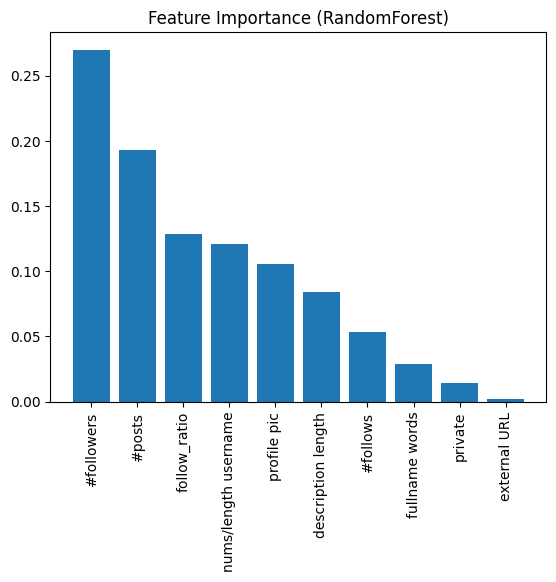

In [16]:

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix ({best_model_name})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


cv_scores = cross_val_score(best_model, X, Y, cv=5)
print("\nCross Validation Scores:", cv_scores)
print("\nMean Accuracy:", np.mean(cv_scores))

y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"\nAUC Score = {auc_score:.4f}\n")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_model_name} ({best_scaler})")
plt.legend()
plt.show()

print()
if best_model_name in ["DecisionTree", "RandomForest"]:
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure()
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
    plt.title(f"Feature Importance ({best_model_name})")
    plt.show()
else:
    print("\nFeature importance not available for KNN")

# Classification report

In [17]:
df_cr = pd.DataFrame(classification_report(y_test, pred,output_dict=True))
print(df_cr)

                    0           1  accuracy   macro avg  weighted avg
precision    0.966851    0.955307  0.961111    0.961079      0.961175
recall       0.956284    0.966102  0.961111    0.961193      0.961111
f1-score     0.961538    0.960674  0.961111    0.961106      0.961114
support    183.000000  177.000000  0.961111  360.000000    360.000000
